In [1]:
import pandas as pd
import numpy as np
from tabulate import tabulate
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.formula.api as smapi
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("US_Accidents_Dec21_updated.csv")

### Meet the Data and the Setting

##### Background  
This is a countrywide traffic accident dataset, which covers 49 states of the United States. The data is continuously being collected from February 2016, using several data providers, including multiple APIs that provide streaming traffic event data. These APIs broadcast traffic events captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks. Currently, there are about 1.5 million accident records in this dataset.

##### The Dataset
US-Accidents can be used for numerous applications such as real-time car accident prediction, studying car accidents hotspot locations, casualty analysis and extracting cause and effect rules to predict car accidents, and studying the impact of precipitation or other environmental stimuli on accident occurrence.

- **ID:** This is a unique identifier of the accident record.
- **Severity:** Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).
- **Start_Time:** Shows start time of the accident in local time zone.
- **End_Time:** Shows end time of the accident in local time zone. End time here refers to when the impact of accident on traffic flow was dismissed.
- **Start_Lat:** Shows latitude in GPS coordinate of the start point.
- **Start_Lng:** Shows longitude in GPS coordinate of the start point.
- **End_Lat:** Shows latitude in GPS coordinate of the end point. 
- **End_Lng:** Shows longitude in GPS coordinate of the end point. 
- **Distance(mi):** The length of the road extent affected by the accident. 
- **Description:** Shows natural language description of the accident. 
- **Street:** Shows the street number in address field. 
- **Side:** Shows the relative side of the street (Right/Left) in address field.
- **City:** Shows the city in address field. 
- **County:** Shows the county in address field. 
- **State:** Shows the state in address field. 
- **Zipcode:** Shows the zipcode in address field. 
- **Country:** Shows the country in address field. 
- **Timezone:** Shows timezone based on the location of the accident (eastern, central, etc.). 
- **Airport_Code:** Denotes an airport-based weather station which is the closest one to location of the accident. 
- **Weather_Timestamp:** Shows the time-stamp of weather observation record (in local time). 
- **Temperature(F):** Shows the temperature (in Fahrenheit). 
- **Wind_Chill(F):** Shows the wind chill (in Fahrenheit). 
- **Humidity(%):** Shows the humidity (in percentage). 
- **Pressure(in):** Shows the air pressure (in inches). 
- **Visibility(mi):** Shows visibility (in miles). 
- **Wind_Direction:** Shows wind direction. 
- **Wind_Speed(mph):** Shows wind speed (in miles per hour). 
- **Precipitation(in):** Shows precipitation amount in inches, if there is any. 
- **Weather_Condition:** Shows the weather condition (rain, snow, thunderstorm, fog, etc.) 
- **Amenity:** A POI annotation which indicates presence of amenity in a nearby location. 
- **Bump:** A POI annotation which indicates presence of speed bump or hump in a nearby location. 
- **Crossing:** A POI annotation which indicates presence of crossing in a nearby location. 
- **Give_Way:** A POI annotation which indicates presence of give_way in a nearby location. 
- **Junction:** A POI annotation which indicates presence of junction in a nearby location. 
- **No_Exit:** A POI annotation which indicates presence of no_exit in a nearby location. 
- **Railway:** A POI annotation which indicates presence of railway in a nearby location. 
- **Roundabout:** A POI annotation which indicates presence of roundabout in a nearby location. 
- **Station:** A POI annotation which indicates presence of station in a nearby location. 
- **Stop:** A POI annotation which indicates presence of stop in a nearby location. 
- **Traffic_Calming:** A POI annotation which indicates presence of traffic_calming in a nearby location. 
- **Traffic_Signal:** A POI annotation which indicates presence of traffic_signal in a nearby loction. 
- **Turning_Loop:** A POI annotation which indicates presence of turning_loop in a nearby location. 
- **Sunrise_Sunset:** Shows the period of day (i.e. day or night) based on sunrise/sunset. 
- **Civil_Twilight:** Shows the period of day (i.e. day or night) based on civil twilight. 
- **Nautical_Twilight:** Shows the period of day (i.e. day or night) based on nautical twilight. 
- **Astronomical_Twilight:** Shows the period of day (i.e. day or night) based on astronomical twilight. 



- **___weathersit:**<br>
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

In [3]:
# Printing first and last two rows of the data
pd.concat([data.head(2), data.tail(2)])

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,NaN,San Diego Fwy S,R,Culver City,Los Angeles,CA,90230,US,US/Pacific,KSMO,2019-08-23 18:51:00,71.0,71.0,81.0,29.62,10.0,SW,8.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2845341,A-2845342,2,2019-08-23 18:52:06,2019-08-23 19:21:31,34.13393,-117.23092,34.13736,-117.23934,0.537,At Highland Ave/Arden Ave - Accident.,NaN,CA-210 W,R,Highland,San Bernardino,CA,92346,US,US/Pacific,KSBD,2019-08-23 20:50:00,79.0,79.0,47.0,28.63,7.0,SW,7.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [4]:
# Summary Statistics of the data
print("Summary of the data:")
data.describe()

Summary of the data:


,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [5]:
# Data Type
print("Data Type:")
data.info()

Data Type:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Ch

In [6]:
# Dropping Un-relevant features like timestamps and location except the "State"
    features_to_drop = ["ID", "Start_Time", "End_Time", "Description", "Street", "County", "Zipcode", "Country", "Timezone", "Airport_Code", "Weather_Timestamp", "Sunrise_Sunset", "Nautical_Twilight", "Astronomical_Twilight"]
data = data.drop(features_to_drop, axis=1)

print("Dimension of the data after dropping:", data.shape)

Dimension of the data after dropping: (2845342, 33)


In [7]:
# Getting total number of missing data
print("Total number of missing entries:", data.isna().sum().sum())

# Retriving column wise missing data
print("Features       ||     No. of Missing entries")
null = data.isna().sum().sort_values()
print(null)

Total number of missing entries: 3340483
Features       ||     No. of Missing entries
Severity                   0
Amenity                    0
Give_Way                   0
Junction                   0
Turning_Loop               0
No_Exit                    0
Railway                    0
Roundabout                 0
Station                    0
Stop                       0
Traffic_Calming            0
State                      0
Side                       0
Traffic_Signal             0
Distance(mi)               0
End_Lng                    0
End_Lat                    0
Start_Lng                  0
Start_Lat                  0
Bump                       0
Crossing                   0
City                     137
Civil_Twilight          2867
Pressure(in)           59200
Temperature(F)         69274
Visibility(mi)         70546
Weather_Condition      70636
Humidity(%)            73092
Wind_Direction         73775
Wind_Speed(mph)       157944
Wind_Chill(F)         469643
Precipitation(i

In [8]:
# Retriving the only columns that are having missing values above 500
list(null[null>500].index.values), len(null[null>500].index.values)

(['Civil_Twilight',
  'Pressure(in)',
  'Temperature(F)',
  'Visibility(mi)',
  'Weather_Condition',
  'Humidity(%)',
  'Wind_Direction',
  'Wind_Speed(mph)',
  'Wind_Chill(F)',
  'Precipitation(in)',
  'Number'],
 11)

We have a total of 18 Columns with missing values above 500

<AxesSubplot:>

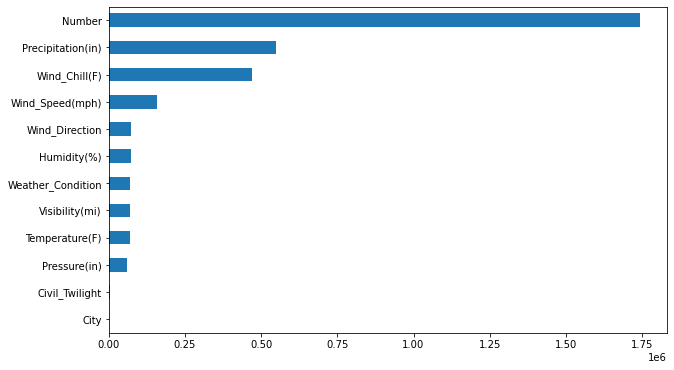

In [9]:
# Plotting a graph for missing value
plt.figure(figsize=(10, 6))
null[null!=0].plot(kind='barh')

We will drop the Column "Number" as we have no description on that and also it has more missing values

In [10]:
# Dropping the Column:"Numbers"
data = data.drop(columns="Number")
print("Shape of data after dropping:", data.shape)

Shape of data after dropping: (2845342, 32)


In [11]:
# Dropping the missing values
df = data.dropna()
print("Dimension of the data before dropping missing values:", data.shape)
print("Dimension of the data after dropping missing values:", df.shape)

Dimension of the data before dropping missing values: (2845342, 32)
Dimension of the data after dropping missing values: (2207326, 32)


In [12]:
# Checking for Null values
print("Total no. of missing values:", df.isna().sum().sum())

Total no. of missing values: 0


In [13]:
# Looking for duplicate entries
duplicateRows = df[df.duplicated()]
print(duplicateRows) # No duplicate entries are found

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [14]:
# Correlation
correlation = df.corr()
print(correlation["Severity"].sort_values(ascending=False))

Severity             1.000000
End_Lng              0.089612
Start_Lng            0.089610
End_Lat              0.086241
Start_Lat            0.086238
Distance(mi)         0.062377
Junction             0.040931
Humidity(%)          0.032018
Wind_Speed(mph)      0.025306
Give_Way             0.006676
Precipitation(in)    0.004666
Roundabout          -0.001147
Stop                -0.001350
Railway             -0.001554
Traffic_Calming     -0.002072
Bump                -0.002389
Amenity             -0.003545
No_Exit             -0.003726
Traffic_Signal      -0.009883
Visibility(mi)      -0.011187
Station             -0.014802
Crossing            -0.035509
Temperature(F)      -0.038539
Wind_Chill(F)       -0.041909
Pressure(in)        -0.042316
Turning_Loop              NaN
Name: Severity, dtype: float64


Since, no variable is highly correlated with our target variable "Severity", we dont have multicollinearity with the data against Severity. So we will now check for correlation against the independent variables.

<AxesSubplot:>

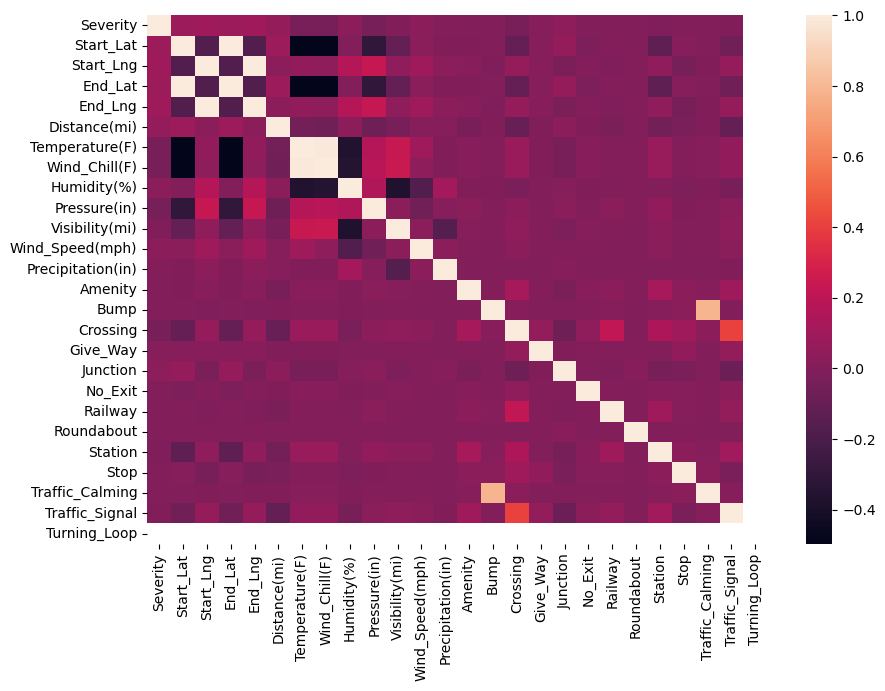

In [15]:
# Correlation: Heatmap
corr_matrix = df.corr()
corr_matrix

plt.figure(figsize=(10, 7), dpi=100)
sns.heatmap(corr_matrix)

In [16]:
# Correlation between Logitude and Latitude
print("Correlation between Starting and Ending Longitude of the accident location is", df["Start_Lng"].corr(df["End_Lng"]))
print("Correlation between Starting and Ending Latitude of the accident location is", df["Start_Lat"].corr(df["End_Lat"]))

# Correlation between Temperature and Wind_Chill
print("Correlation between Temperature and Wind_Chill is", df["Temperature(F)"].corr(df["Wind_Chill(F)"]))

Correlation between Starting and Ending Longitude of the accident location is 0.999999207784793
Correlation between Starting and Ending Latitude of the accident location is 0.9999955926592332
Correlation between Temperature and Wind_Chill is 0.9939167966376544


From the Correlation plot, we can see that the independant variables "End_Lat & Start_Lat => 0.99" and 
"Wind_Chill(F) & Temperature(F) => 0.99" are highly correlated, So dropping either one of the variables between them will prevent multicollinearity. 

Practically, almost 99% of the time, Starting and Ending point of the accident location is same, which is natural as the accident location may not change expect just going to either side of road and that distance is negligible. So we can eliminate either one of the points.

Also, we can drop either Temperature or Wind_Chill, as they have higher correlation.

In [17]:
# Dropping Longitude and Latitude of the Ending point and Wind_Chill(F)
df = df.drop(columns = ["End_Lng", "End_Lat", "Wind_Chill(F)"])
print("Shape of data after dropping:", df.shape)

Shape of data after dropping: (2207326, 29)


# EDA

Text(0.5, 1.0, 'States with No. of Accidents')

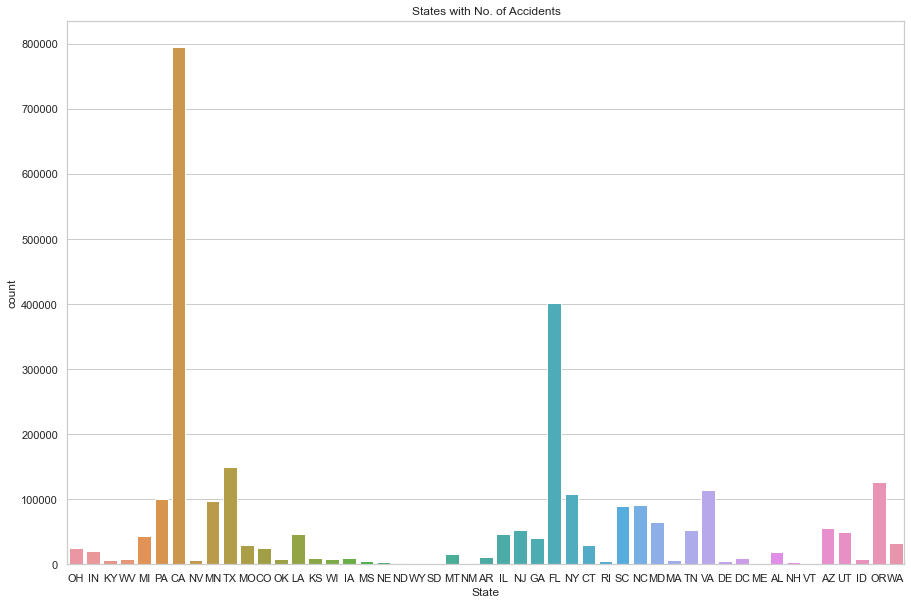

In [18]:
# State Vs Severity
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
sns.countplot(data['State'])
plt.title("States with No. of Accidents")

Text(0.5, 1.0, 'Accident: Top 20 Cities')

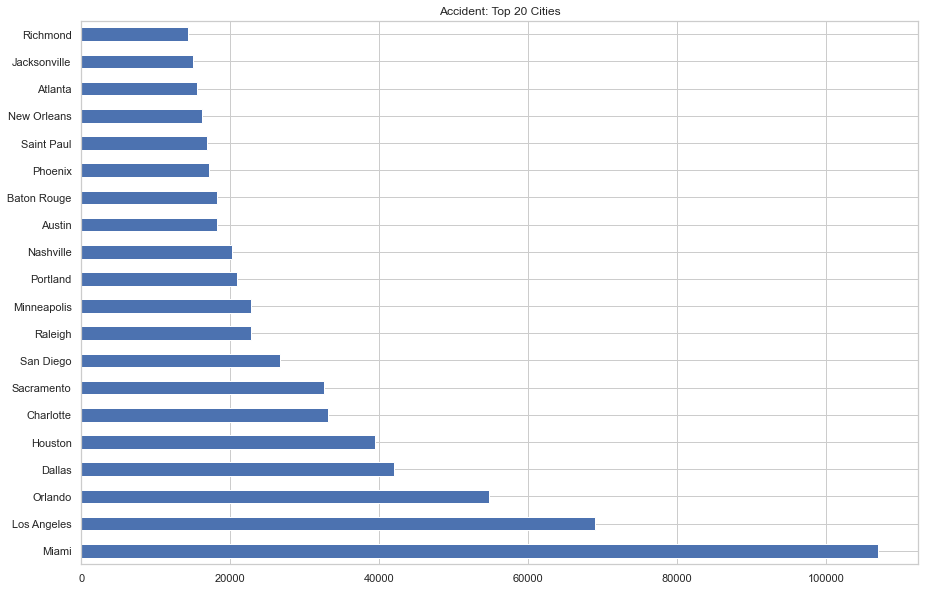

In [19]:
# Top Cities with most accidents
plt.figure(figsize=(15,10))
cities_by_accident = data.City.value_counts()
cities_by_accident[:20].plot(kind='barh')
plt.title("Accident: Top 20 Cities")

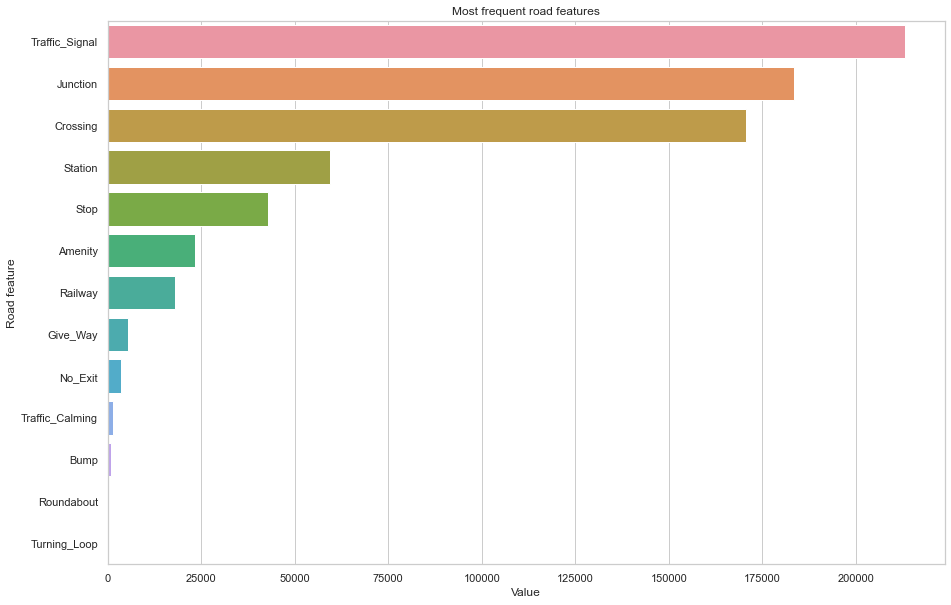

In [20]:
# Accident VS Road Features
road_features = ["Amenity", "Bump", "Crossing", "Give_Way", "Junction", "No_Exit", "Railway", "Roundabout", "Station", "Stop", "Traffic_Calming", "Traffic_Signal", "Turning_Loop"]
feat = df[road_features].sum().sort_values(ascending=False)

plt.figure(figsize=(15, 10))
plt.title("Most frequent road features")
sns.barplot(feat.values, feat.index, orient="h")
plt.xlabel("Value")
plt.ylabel("Road feature")
plt.show()

Lets take a closer look at Turning_Loop and Roundabout.

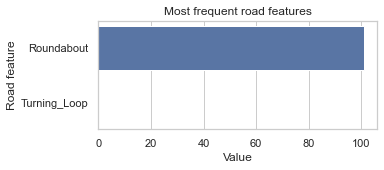

In [21]:
close_road_features = ["Roundabout", "Turning_Loop"]
close_feat = df[close_road_features].sum().sort_values(ascending=False)

plt.figure(figsize=(5, 2))
plt.title("Most frequent road features")
sns.barplot(close_feat.values, close_feat.index, orient="h")
plt.xlabel("Value")
plt.ylabel("Road feature")
plt.show()

From the graph it is noted that Turning_Loop doesn't have any accidents. So we can drop that variable.

In [22]:
# Dropping Turning_Loop
df = df.drop(columns = ["Turning_Loop"])
print("Shape of data after dropping:", df.shape)

Shape of data after dropping: (2207326, 28)


Number of unique values in Weather_Condition: 114


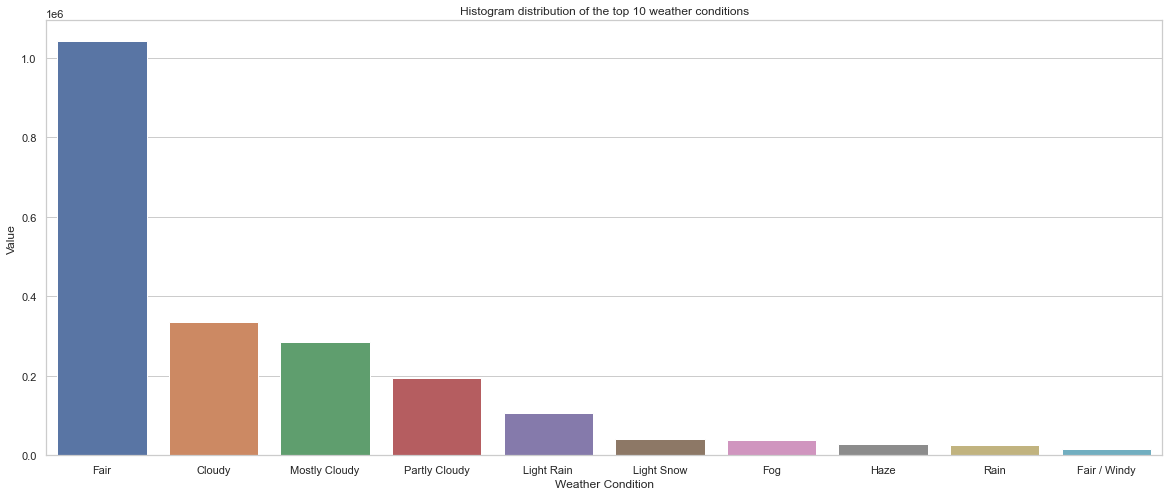

In [23]:
# Accidents VS Weather_Conditions
print("Number of unique values in Weather_Condition:", len(list(df["Weather_Condition"].unique())))

counts = df["Weather_Condition"].value_counts()[:10]
plt.figure(figsize=(20, 8))
plt.title("Histogram distribution of the top 10 weather conditions")
sns.barplot(counts.index, counts.values)
plt.xlabel("Weather Condition")
plt.ylabel("Value")
plt.show()

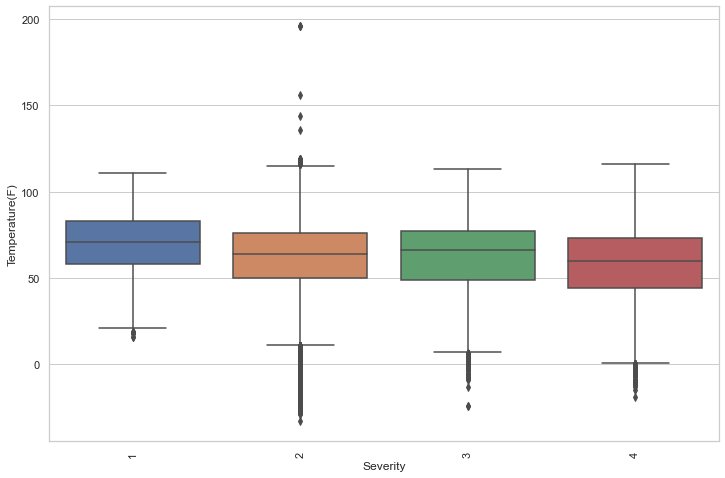

In [24]:
# Severity VS Temperature(F)
plt.figure(figsize=(12,8))
sns.boxplot(df["Severity"], df["Temperature(F)"])
plt.xticks(rotation='vertical')
plt.show()

From the plot above, it noted that almost all the Accidents occur at normal temperature between 55-80 F.

Text(0.5, 0, 'Severity')

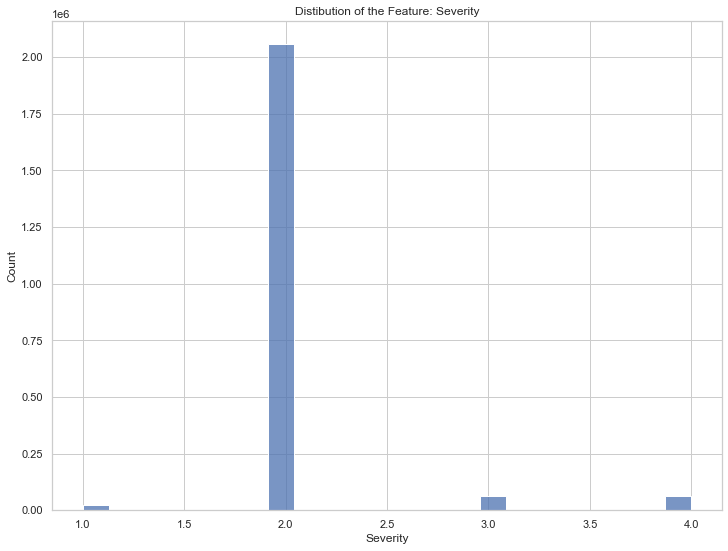

In [25]:
# Histogram plot for the feature, "Severity"
plt.figure(figsize=(12,9))
sns.histplot(df["Severity"])
plt.title("Distibution of the Feature: Severity")
plt.xlabel("Severity")

Data is severly imbalanced with Severity(2) having a very high number of observations than the other categories in that label.

Since we have more data we can perform Undersampling the data.

In [26]:
size = len(df[df["Severity"]==1].index)
bal_df = pd.DataFrame()
for i in range(1,5):
    S = df[df["Severity"]==i]
    bal_df = bal_df.append(S.sample(size, random_state=42))
df = bal_df

Text(0.5, 0, 'Severity')

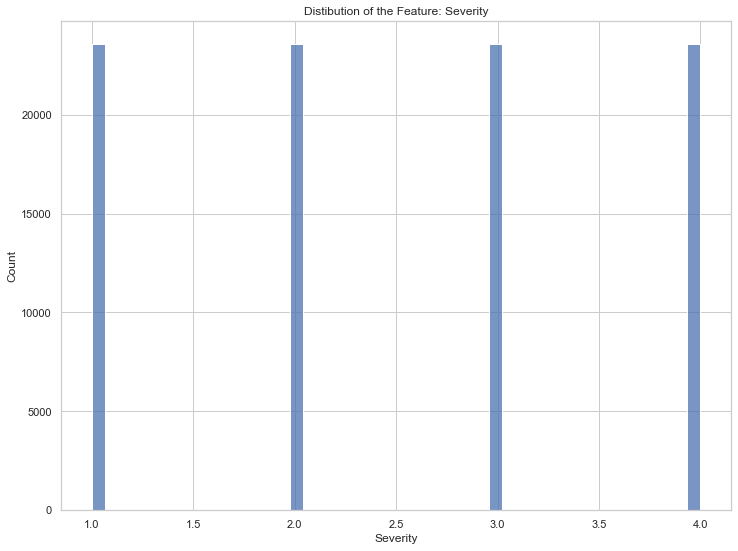

In [27]:
# Histogram plot for the feature, "Severity"
plt.figure(figsize=(12,9))
sns.histplot(df["Severity"])
plt.title("Distibution of the Feature: Severity")
plt.xlabel("Severity")

Now the data look more appealing

In [28]:
print("Dimension of the data after undersampling is", df.shape)

Dimension of the data after undersampling is (94224, 28)


# Dummies

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94224 entries, 2111274 to 2275923
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Severity           94224 non-null  int64  
 1   Start_Lat          94224 non-null  float64
 2   Start_Lng          94224 non-null  float64
 3   Distance(mi)       94224 non-null  float64
 4   Side               94224 non-null  object 
 5   City               94224 non-null  object 
 6   State              94224 non-null  object 
 7   Temperature(F)     94224 non-null  float64
 8   Humidity(%)        94224 non-null  float64
 9   Pressure(in)       94224 non-null  float64
 10  Visibility(mi)     94224 non-null  float64
 11  Wind_Direction     94224 non-null  object 
 12  Wind_Speed(mph)    94224 non-null  float64
 13  Precipitation(in)  94224 non-null  float64
 14  Weather_Condition  94224 non-null  object 
 15  Amenity            94224 non-null  bool   
 16  Bump          

First, we will convert the boolean Column into 1 and 0

In [30]:
x = df.iloc[:, 1:28] # Collecting all expect the first column which is Severity
y = df["Severity"]

print("Shape of y is", y.shape)
print("Shape of x is", x.shape)

Shape of y is (94224,)
Shape of x is (94224, 27)


In [31]:
# Replacing "Bool" into "int"
x = x.replace([True, False], [1, 0])

In [32]:
# x.head()

In [33]:
# One hot encoding categorical columns
onehot_cols = ["Side", "Wind_Direction", "Weather_Condition", "Civil_Twilight"]
x = pd.get_dummies(x, columns=onehot_cols, drop_first=True)

# Removing City and State
x = x.drop(columns=["City", "State"])
x.head()

,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Side_R,Wind_Direction_E,Wind_Direction_ENE,Wind_Direction_ESE,Wind_Direction_East,Wind_Direction_N,Wind_Direction_NE,Wind_Direction_NNE,Wind_Direction_NNW,Wind_Direction_NW,Wind_Direction_North,Wind_Direction_S,Wind_Direction_SE,Wind_Direction_SSE,Wind_Direction_SSW,Wind_Direction_SW,Wind_Direction_South,Wind_Direction_VAR,Wind_Direction_Variable,Wind_Direction_W,Wind_Direction_WNW,Wind_Direction_WSW,Wind_Direction_West,Weather_Condition_Blowing Dust / Windy,Weather_Condition_Blowing Snow,Weather_Condition_Clear,Weather_Condition_Cloudy,Weather_Condition_Cloudy / Windy,Weather_Condition_Drizzle,Weather_Condition_Drizzle / Windy,Weather_Condition_Drizzle and Fog,Weather_Condition_Fair,Weather_Condition_Fair / Windy,Weather_Condition_Fog,Weather_Condition_Fog / Windy,Weather_Condition_Freezing Rain,Weather_Condition_Haze,Weather_Condition_Haze / Windy,Weather_Condition_Heavy Drizzle,Weather_Condition_Heavy Rain,Weather_Condition_Heavy Rain / Windy,Weather_Condition_Heavy Rain Shower,Weather_Condition_Heavy Snow,Weather_Condition_Heavy Snow / Windy,Weather_Condition_Heavy T-Storm,Weather_Condition_Heavy T-Storm / Windy,Weather_Condition_Heavy Thunderstorms and Rain,Weather_Condition_Ice Pellets,Weather_Condition_Light Blowing Snow,Weather_Condition_Light Drizzle,Weather_Condition_Light Drizzle / Windy,Weather_Condition_Light Freezing Drizzle,Weather_Condition_Light Freezing Fog,Weather_Condition_Light Freezing Rain,Weather_Condition_Light Freezing Rain / Windy,Weather_Condition_Light Ice Pellets,Weather_Condition_Light Rain,Weather_Condition_Light Rain / Windy,Weather_Condition_Light Rain Shower,Weather_Condition_Light Rain with Thunder,Weather_Condition_Light Sleet,Weather_Condition_Light Snow,Weather_Condition_Light Snow / Windy,Weather_Condition_Light Snow and Sleet / Windy,Weather_Condition_Light Snow with Thunder,Weather_Condition_Light Thunderstorms and Rain,Weather_Condition_Light Thunderstorms and Snow,Weather_Condition_Mist,Weather_Condition_Mostly Cloudy,Weather_Condition_Mostly Cloudy / Windy,Weather_Condition_N/A Precipitation,Weather_Condition_Overcast,Weather_Condition_Partly Cloudy,Weather_Condition_Partly Cloudy / Windy,Weather_Condition_Patches of Fog,Weather_Condition_Patches of Fog / Windy,Weather_Condition_Rain,Weather_Condition_Rain / Windy,Weather_Condition_Sand / Dust Whirlwinds,Weather_Condition_Scattered Clouds,Weather_Condition_Shallow Fog,Weather_Condition_Showers in the Vicinity,Weather_Condition_Sleet,Weather_Condition_Small Hail,Weather_Condition_Smoke,Weather_Condition_Smoke / Windy,Weather_Condition_Snow,Weather_Condition_Snow / Windy,Weather_Condition_Snow and Sleet,Weather_Condition_Squalls / Windy,Weather_Condition_T-Storm,Weather_Condition_T-Storm / Windy,Weather_Condition_Thunder,Weather_Condition_Thunder / Windy,Weather_Condition_Thunder and Hail,Weather_Condition_Thunder and Hail / Windy,Weather_Condition_Thunder in the Vicinity,Weather_Condition_Thunderstorms and Rain,Weather_Condition_Widespread Dust,Weather_Condition_Wintry Mix,Weather_Condition_Wintry Mix / Windy,Civil_Twilight_Night
2111274,40.86161,-111.92986,0.0,79.0,18.0,25.41,8.0,21.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2104185,32.28663,-110.96110,0.0,93.0,8.0,27.14,10.0,7.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2078194,46.10669,-123.20672,0.0,68.0,50.0,29.99,10.0,7.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0

# Data Splitting

In [34]:
# train-test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.4, random_state= 28, stratify=y)

In [35]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((56534, 123), (37690, 123), (56534,), (37690,))

# Scaling

In [36]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler(feature_range=(0,1))

# Train our scaler
minmax.fit(x_train)

# Get scaled variables
x_train_scaled = minmax.transform(x_train)
x_test_scaled = minmax.transform(x_test)
# x_train_scaled

# Modeling

### Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error

# Training the model
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
log_reg.fit(x_train_scaled, y_train)

LogisticRegression(multi_class='multinomial')

In [38]:
# Accuracy for test set
print("Test set Accuracy is:", log_reg.score(x_test_scaled, y_test))

Test set Accuracy is: 0.4699124436189971


In [39]:
y_pred1 = log_reg.predict(x_test_scaled)
acc1 = accuracy_score(y_test, y_pred1)*100
rmse1 = mean_squared_error(y_test, y_pred1)

In [44]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           1       0.57      0.53      0.55      9422
           2       0.43      0.48      0.45      9423
           3       0.43      0.42      0.43      9422
           4       0.46      0.45      0.45      9423

    accuracy                           0.47     37690
   macro avg       0.47      0.47      0.47     37690
weighted avg       0.47      0.47      0.47     37690



### kNN

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Defining the parameters (neighbors)
param_knn = {'n_neighbors': range(1, 26, 2)}  

# Training the k-NN model
kn = KNeighborsClassifier()
knn = GridSearchCV(kn, param_knn, cv = 10)
knn.fit(x_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 26, 2)})

In [46]:
# Chosen hyperparameter (k)
print("The chosen hyperparamter (k) is", knn.best_params_)

# Mean validation score of the chosen best model:
print("Mean validation accuracy of the best model is", knn.best_score_)

# Test accuracy 
print("Test accuracy when the best k is applied is", knn.score(x_test_scaled, y_test))

The chosen hyperparamter (k) is {'n_neighbors': 1}
Mean validation accuracy of the best model is 0.47401561576346357
Test accuracy when the best k is applied is 0.47758026001591936


In [47]:
y_pred3 = knn.predict(x_test_scaled)
acc3 = accuracy_score(y_test, y_pred3)*100
rmse3 = mean_squared_error(y_test, y_pred3)

In [48]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           1       0.60      0.64      0.62      9422
           2       0.43      0.41      0.42      9423
           3       0.45      0.45      0.45      9422
           4       0.42      0.41      0.41      9423

    accuracy                           0.48     37690
   macro avg       0.47      0.48      0.48     37690
weighted avg       0.47      0.48      0.48     37690



### Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Defining the function
opt_tree = DecisionTreeClassifier(random_state = 0)

# Defining a list of parameters
dt_params = {'max_depth':  range(1,10)         ,
             'min_samples_split':   range(2,11),
             'max_leaf_nodes':    range(2,50)   }

# Applying grid search and training the model
grid_tree = GridSearchCV(opt_tree, dt_params, cv= 5)
grid_tree.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': range(1, 10),
                         'max_leaf_nodes': range(2, 11),
                         'min_samples_split': range(2, 11)})

In [50]:
# Best hyperparameter chosen:
print('Best max_depth:', grid_tree.best_params_)

# Best validation score through CV is:
print('Mean Validation Score:', grid_tree.best_score_)

# Test accuracy
print('Test accuracy:', grid_tree.score(x_test_scaled, y_test))

Best max_depth: {'max_depth': 5, 'max_leaf_nodes': 10, 'min_samples_split': 2}
Mean Validation Score: 0.5688790537558385
Test accuracy: 0.5639426903687981


In [51]:
from sklearn import tree
print(tree.export_text(grid_tree.best_estimator_))

|--- feature_2 <= 0.00
|   |--- feature_0 <= 0.57
|   |   |--- feature_11 <= 0.50
|   |   |   |--- feature_0 <= 0.43
|   |   |   |   |--- feature_1 <= 0.19
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_1 >  0.19
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  0.43
|   |   |   |   |--- class: 1
|   |   |--- feature_11 >  0.50
|   |   |   |--- class: 1
|   |--- feature_0 >  0.57
|   |   |--- feature_1 <= 0.27
|   |   |   |--- class: 1
|   |   |--- feature_1 >  0.27
|   |   |   |--- class: 3
|--- feature_2 >  0.00
|   |--- feature_0 <= 0.55
|   |   |--- feature_2 <= 0.00
|   |   |   |--- class: 2
|   |   |--- feature_2 >  0.00
|   |   |   |--- class: 2
|   |--- feature_0 >  0.55
|   |   |--- feature_1 <= 0.66
|   |   |   |--- class: 4
|   |   |--- feature_1 >  0.66
|   |   |   |--- class: 4



In [52]:
y_pred4 = grid_tree.predict(x_test_scaled)
acc4 = accuracy_score(y_test, y_pred4)*100
rmse4 = mean_squared_error(y_test, y_pred4)

In [53]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           1       0.75      0.81      0.78      9422
           2       0.47      0.59      0.53      9423
           3       0.67      0.28      0.39      9422
           4       0.46      0.58      0.51      9423

    accuracy                           0.56     37690
   macro avg       0.59      0.56      0.55     37690
weighted avg       0.59      0.56      0.55     37690



### Naive Bayes

In [54]:
from sklearn.naive_bayes import GaussianNB

g_nb = GaussianNB()

g_nb.fit(x_train_scaled, y_train)

GaussianNB()

In [55]:
g_nb.score(x_test_scaled, y_test)

0.269859379145662

In [56]:
y_pred5 = g_nb.predict(x_test_scaled)
acc5 = accuracy_score(y_test, y_pred5)*100
rmse5 = mean_squared_error(y_test, y_pred5)

In [57]:
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           1       0.26      0.99      0.41      9422
           2       0.29      0.04      0.07      9423
           3       0.48      0.04      0.07      9422
           4       0.54      0.02      0.03      9423

    accuracy                           0.27     37690
   macro avg       0.39      0.27      0.15     37690
weighted avg       0.39      0.27      0.15     37690



### SVM: Linear

In [71]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

# Defining the function
linear_svc = LinearSVC(random_state = 0) # must specify random state here

# Defining a list of parameters
params_svc = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 10000, 1000000]}

# Applying grid search and training the model
grid_lr_svc = GridSearchCV(linear_svc, params_svc, cv = 5, n_jobs = -1)
grid_lr_svc.fit(x_train_scaled, y_train)

/Users/venkie/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/venkie/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/venkie/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/venkie/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/venkie/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/venkie/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.p

GridSearchCV(cv=5, estimator=LinearSVC(random_state=0), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 10000, 1000000]})

In [72]:
# Best hyperparameter chosen:
print('Best C:', grid_lr_svc.best_params_)

# Best validation score through CV is:
print('Mean Validation Score:', grid_lr_svc.best_score_)

# Test accuracy
print("Test accuracy:", grid_lr_svc.score(x_test_scaled, y_test))

Best C: {'C': 10}
Mean Validation Score: 0.48082571781167915
Test accuracy: 0.47712921199257097


In [73]:
y_pred6 = grid_lr_svc.predict(x_test_scaled)
acc6 = accuracy_score(y_test, y_pred6)*100
rmse6 = mean_squared_error(y_test, y_pred6)

In [74]:
print(classification_report(y_test, y_pred6))

              precision    recall  f1-score   support

           1       0.56      0.55      0.55      9422
           2       0.43      0.47      0.45      9423
           3       0.44      0.43      0.44      9422
           4       0.48      0.46      0.47      9423

    accuracy                           0.48     37690
   macro avg       0.48      0.48      0.48     37690
weighted avg       0.48      0.48      0.48     37690



### SVM: Kernel

In [75]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Defining the function
base_k = SVC(random_state= 0, kernel = 'rbf')

# Defining a list of parameters
param_svc_kernel = {'C':  [0.1, 1, 10]     ,
                    'gamma':   [0.01, 1, 10]}

# Applying grid search and training the model
grid_kernel = GridSearchCV(base_k, param_svc_kernel, cv = 5, n_jobs=-1)
grid_kernel.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=0), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.01, 1, 10]})

In [76]:
# Best hyperparameter chosen:
print('Best C:', grid_kernel.best_params_)

# Best validation score through CV is:
print('Mean Validation Score:', grid_kernel.best_score_)

# Test accuracy
print("Test accuracy:", grid_kernel.score(x_test_scaled, y_test))

Best C: {'C': 10, 'gamma': 1}
Mean Validation Score: 0.4980367333880687
Test accuracy: 0.5062881400902096


In [77]:
y_pred7 = grid_kernel.predict(x_test_scaled)
acc7 = accuracy_score(y_test, y_pred7)*100
rmse7 = mean_squared_error(y_test, y_pred7)

In [78]:
print(classification_report(y_test, y_pred7))

              precision    recall  f1-score   support

           1       0.61      0.63      0.62      9422
           2       0.48      0.45      0.47      9423
           3       0.48      0.48      0.48      9422
           4       0.45      0.47      0.46      9423

    accuracy                           0.51     37690
   macro avg       0.51      0.51      0.51     37690
weighted avg       0.51      0.51      0.51     37690



### Ensemble: Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=200, 
                                 max_samples=1000, 
                                 max_depth=6,
                                 min_samples_split=2,
                                 max_leaf_nodes=10,
                                 random_state = 0)

rnd_clf.fit(x_train_scaled, y_train)

RandomForestClassifier(max_depth=6, max_leaf_nodes=10, max_samples=1000,
                       n_estimators=200, random_state=0)

In [65]:
print("The test accuracy for the ensemble:random forest is", rnd_clf.score(x_test_scaled, y_test))

The test accuracy for the ensemble:random forest is 0.5722738126824092


In [66]:
y_pred8 = rnd_clf.predict(x_test_scaled)
acc8 = accuracy_score(y_test, y_pred8)*100
rmse8 = mean_squared_error(y_test, y_pred8)

In [67]:
print(classification_report(y_test, y_pred8))

              precision    recall  f1-score   support

           1       0.67      0.84      0.74      9422
           2       0.50      0.56      0.53      9423
           3       0.66      0.31      0.42      9422
           4       0.50      0.58      0.54      9423

    accuracy                           0.57     37690
   macro avg       0.58      0.57      0.56     37690
weighted avg       0.58      0.57      0.56     37690



### Ensemble: Ada Boost

In [58]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

# Define base model
naive_dt = GaussianNB()

# AdaBoost
ada_clf = AdaBoostClassifier(naive_dt, 
                             n_estimators=200, 
                             learning_rate=0.3,
                             random_state=0)

ada_clf.fit(x_train_scaled, y_train)

AdaBoostClassifier(base_estimator=GaussianNB(), learning_rate=0.3,
                   n_estimators=200, random_state=0)

In [63]:
# Test accuracy
print("Test accuracy:", ada_clf.score(x_test_scaled, y_test))

Test accuracy: 0.2868665428495622


In [60]:
y_pred9 = ada_clf.predict(x_test_scaled)
acc9 = accuracy_score(y_test, y_pred9)*100
rmse9 = mean_squared_error(y_test, y_pred9)

In [61]:
print(classification_report(y_test, y_pred9))

              precision    recall  f1-score   support

           1       0.33      0.26      0.29      9422
           2       0.28      0.30      0.29      9423
           3       0.30      0.24      0.27      9422
           4       0.26      0.35      0.30      9423

    accuracy                           0.29     37690
   macro avg       0.29      0.29      0.29     37690
weighted avg       0.29      0.29      0.29     37690



### Creating Metrics

In [83]:
table = [['Model', 'Accuracy Score','RMSE'],['Logisitic Regression', acc1,rmse1],['kNN', acc3,rmse3],['Decision Tree', acc4,rmse4],['Naive Bayes', acc5,rmse5],['SVM_Linear', acc6,rmse6], ['SVM_Kernel', acc7,rmse7],['Random Forest', acc8,rmse8], ['Ada Boost', acc9,rmse9]]
print(tabulate(table, headers = "firstrow" ))

Model                   Accuracy Score     RMSE
--------------------  ----------------  -------
Logisitic Regression           46.9912  1.46254
kNN                            47.758   1.54595
Decision Tree                  56.3943  1.27485
Naive Bayes                    26.9859  3.27498
SVM_Linear                     47.7129  1.45941
SVM_Kernel                     50.6288  1.47938
Random Forest                  57.2274  1.28814
Ada Boost                      28.6867  2.4134
